# Lecture 5: Solutions

In [98]:
# useful definitions that we've used so far:

function simple_iteration( g, x1; N=100, tol=1e-10 )
    x = [ x1 ]
    for n in 2:N
        push!( x, g(x[n-1]) )
        if (abs(g(x[end]) - x[end]) < tol)
            break
        end
    end
    return x
end

function μ( x, ξ; α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

using Plots
using LaTeXStrings
using Polynomials

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Exercise 1.</strong> 

Show that each of the following have fixed points on $[2,4]$:

\begin{align}
    g_1(x) &= 1 + x - \frac19 x^2 \nonumber\\
    g_2(x) &= \pi + 0.99 \sin x \nonumber\\
    g_3(x) &= x + 1 - \tan\frac{x}4
\end{align}

1. Do you expect the simple iterations $x_{n+1} = g_j( x_n )$ to converge? 
2. Why? 
3. Test your hypothesis numerically. 
4. Compute the order of convergence ($\alpha$) and asymptotic error constants ($\mu$). 

</div> 

Define $g_1, g_2, g_3$:

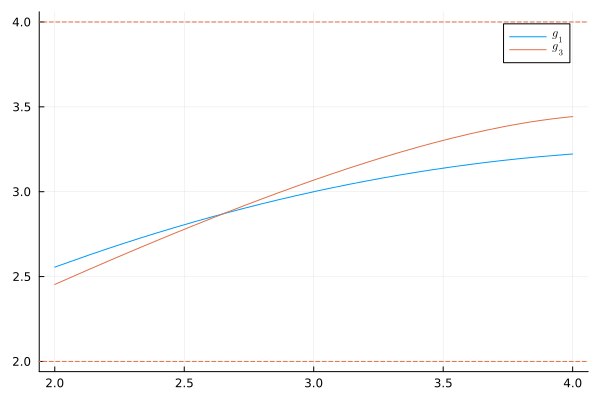

In [99]:
g1 = x -> 1 + x - x^2/9 ;
g2 = x -> π + 0.99 * sin(x);
g3 = x -> x + 1 - tan( x/4 );

g1_der = x -> 1 - 2*x/9;
g2_der = x -> .99 * cos(x);
g3_der = x -> 1 - 1/( 4 * cos(x/4)^2 );

plot( [g1, g3], 2, 4, 
    label=[L"g_1" L"g_3"] )

hline!([2,4], 
    linestyle=:dash, primary=false)

From the plots, we can see that $g_1, g_3 : [2,4] \to [2,4]$ are continuous (and so by Brouwer's theorem there exists fixed points $\xi_1 = g_1(\xi_1)$ and $\xi_3 = g_3(\xi_3)$). The derivatives are bounded above in absolute value by some $L< 1$ as can be seen on the following plot:

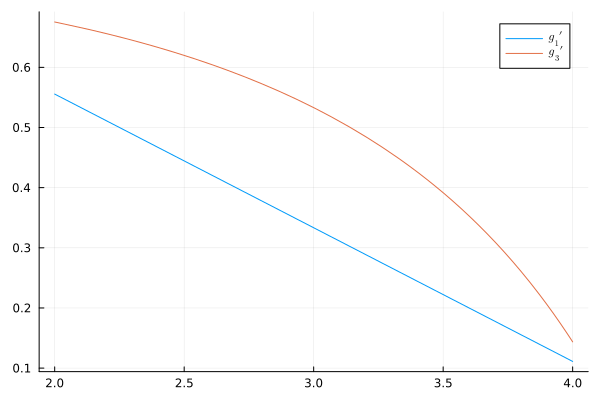

In [100]:
plot( [g1_der, g3_der], 2,4, label=[L"g_1\prime" L"g_3\prime"])

As a result, we may apply the contraction mapping theorem to conclude that $x_{n+1} = g_j(x_n)$ converges to $\xi_{j}$ for every $x_1 \in [2,4]$ and $j=1,3$.  

For the $j = 2$ case, we find that $g_2 : [2.5,3.75] \to [2.5,3.75]$ (as can be seen from the plot below) is continuous and so there exists a fixed point $\xi_2 = g_2(\xi_2) \in [2.5,3.75]$.

(g2(b), g2(a)) = (2.575746948034873, 3.73408007625271)


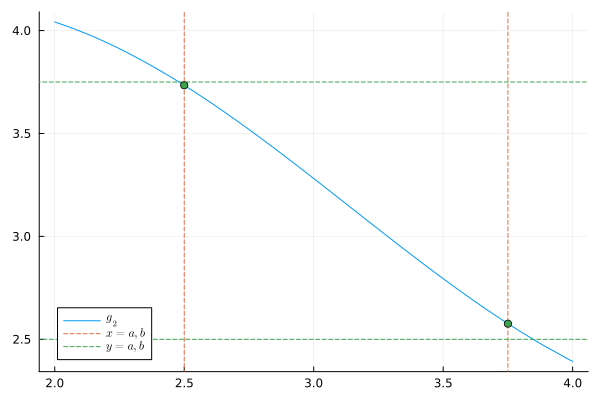

In [101]:
a, b = 2.5, 3.75; 

@show (g2(b), g2(a))

plot( g2, 2, 4, label=L"g_2")
vline!( [a, b] ,label=L"x=a,b", linestyle=:dash)
hline!( [a, b] , label=L"y=a,b",  linestyle=:dash)
scatter!( [a, b], [g2(a), g2(b)], primary=false)

We have $g_2'(x) = 0.99 \sin(x)$ which is bounded in absolute value by $0.99 < 1$ and so $g_2$ is a contraction and by the contraction mapping theorem, we have $x_{n+1} = g_2(x_n)$ converges to the unique fixed point $\xi_2 \in [2.5, 3.75]$ for all $x_1 \in [2.5,3.75]$. If you read this, let me know and you'll get some chocolate next time we meet.

We would also expect the convergence to be linear with $\mu_j = |g_j(\xi_j)|$ where

In [102]:
μ1 = abs( g1_der(3) );
μ2 = abs( g2_der(π) );
μ3 = abs( g3_der(π) );

(μ1, μ2, μ3)

(0.33333333333333337, 0.99, 0.5000000000000001)

## Numerical results:

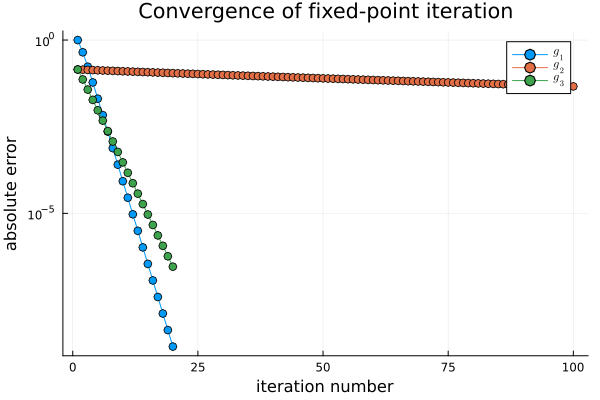

In [103]:
x = simple_iteration( g1, 2.; N=20)
y = simple_iteration( g2, 3.; N=100 )
z = simple_iteration( g3, 3.; N=20 )

err₁ = @. abs( x - 3 );
err₂ = @. abs( y - π );
err₃ = @. abs( z - π );

plot( [err₁, err₂, err₃], label=[L"g_1" L"g_2" L"g_3"],
    m=:o, xaxis=("iteration number"), ylabel="absolute error", yaxis=:log,
    title="Convergence of fixed-point iteration") 

The $\mu_j$ can be computed from looking at $|x_{n+1}-\xi_j|/|x_n-\xi_j|$ for large $n$: (the following is in good agreement with the theoretical values $(1/3, 0.99, 1/2)$ as computed above)


In [104]:
# see the beginning of this notebook for the definition of μ
( μ( x, 3 )[end],  μ( y, π )[end],  μ( z, π )[end] )  

(0.3333332989274659, 0.9896422618328011, 0.5000000720984888)

Since $|x_{n+N}-\xi| \approx \mu^n |x_N - \xi|$, you can also ``see'' $\mu$ in the graph titled "Convergence of fixed-point iteration" above: $\log|x_{n+N} - \xi| \approx n \log \mu + \log |x_N - \xi|$. So the gradient of this linear slope is approximately $\log\mu$:

In [105]:
# fit the points (n, err₁) (for large n) to a linear line  
p₁ = Polynomials.fit(15:20, log.(err₁[15:20]), 1)

Polynomial(1.6095534355202497 - 1.098612275998012*x)

In [106]:
# log μ os approximately the coeeficient of x
@show p₁.coeffs[2];

# therefore μ is approximately
@show exp(p₁.coeffs[2]);

p₁.coeffs[2] = -1.098612275998012
exp(p₁.coeffs[2]) = 0.3333333375566993


Therefore, $\mu_j$ can also be approximated by the following:

In [107]:
p₂ = Polynomials.fit(15:100, log.(err₂[15:100]), 1)
p₃ = Polynomials.fit(15:20, log.(err₃[15:20]), 1)


(exp(p₁.coeffs[2]), exp(p₂.coeffs[2]), exp(p₃.coeffs[2]))

(0.3333333375566993, 0.9890369407262043, 0.500000415523951)

This is to be compared with the theoretical values $(1/3, 0.99, 1/2)$ and the ones computed along the sequence $(0.3333332989274659, 0.9896422618328011, 0.5000000720984888)$

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Exercise 2.</strong> 

Suppose that $g(\xi) = \xi$, $g'(\xi) = 0$ and $|g''|$ is bounded near $\xi$. 

1. Show that the simple iteration $x_{n+1} = g(x_n)$ with $x_1 \approx \xi$ converges to $\xi$. 
2. What is the order of convergence?
3. Can you generalise this statement to the case where $g'(\xi) = \cdots = g^{(\ell-1)}(\xi) = 0$ and $g^{(\ell)}$ bounded near $\xi$?

</div> 

1. The contraction mapping theorem applies in small interval around $\xi$. Therefore, the iteration converges,
2. By the Taylor remainder theorem, there exists $\eta_n$ between $x_n$ and $\xi$ such that

\begin{align}
    |x_{n+1} - \xi| &= |g(x_n) - g(\xi)| \nonumber\\
                    &= \frac{|g''(\eta_n)|}{2} |x_n - \xi|^2 
\end{align}

As a result, taking the limit as $n\to\infty$ and noting that $\eta_n \to \xi$, we have 

\begin{align}
    \lim_{n\to\infty} \frac{|x_{n+1} - \xi|}{|x_n - \xi|^2} = \frac{|g''(\xi)|}{2}
\end{align}

The convergence is therefore at least quadratic. 

3. In this case, we find the convergence is at least order $\ell$ with asymptotic error constant $\frac{|g^{(\ell)}(\xi)|}{\ell!}$. Here, we use the Taylor remainder theorem to conclude there exists some $\eta_n$ such that

\begin{align}
    g(x_n) = g(\xi) + \frac{g^{(\ell)}(\eta_n)}{\ell!} ( x_n - \xi )^n
\end{align}

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Exercise 3.</strong> 

For $\alpha \in (0,1]$, define $x_{n+1} := x_n + \alpha ( g(x_n) - x_n )$ where $g$ is continuous. 

1. Show that if $(x_n) \to \xi$ then $\xi$ is a fixed point of $g$
2. Suppose that $g'$ is continuous with $g'(\xi) < 0$. Show that there exists $\alpha_0 > 0$ such that, if $\alpha \leq \alpha_0$, then $(x_n)$ converges to $\xi$ for all $x_1$ sufficiently close to $\xi$
</div> 

1. Since $g$ is continuous, we get $\xi = \xi + \alpha( g(\xi) - \xi)$ and so $\xi = g(\xi)$
2. This can be written as $x_{n+1} = h(x_n)$ with $h'(x) = 1 - \alpha + \alpha g'(x)$. Suppose that $-M < g'(x) < 0$ for all $x\in I := [\xi-\delta, \xi + \delta]$, then 

\begin{align}
1-\alpha ( 1 + M ) < h' < 1 - \alpha. 
\end{align}

Therefore, when $\alpha < \frac2{1+M}$, $h$ is a contraction and the iteration $x_{n+1} = h(x_n)$ converges for all $x_1 \in I$.